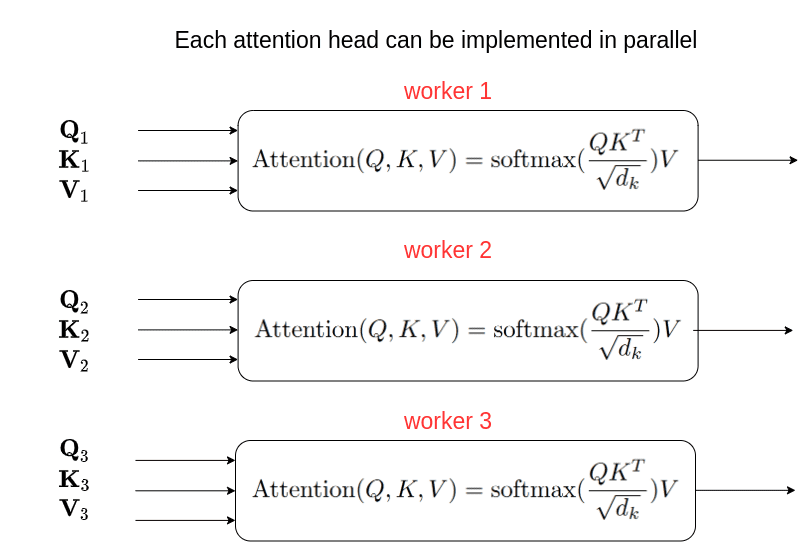

# Implementation

In [ ]:
# encoder representation of four different words
# For Example :- I Love My India
# I = [1,0,0] , Love = [0,1,0] , My = [1,1,0] , India = [0,0,1]
import numpy as np
word_1 = np.array([1,0,0])
word_2 = np.array([0,1,0])
word_3 = np.array([1,1,0])
word_4 = np.array([0,0,1])

In [ ]:
# Generate Weight Matrix
import random
random.seed(42)
W_Q = np.random.randint(3,size=(3,3))   # --- queries
W_K = np.random.randint(3,size=(3,3))   # ---- keys
W_V = np.random.randint(3,size=(3,3))   # --- values

In [ ]:
W_V

array([[1, 1, 1],
       [1, 1, 2],
       [2, 1, 2]])

In [ ]:
Q1 = word_1 @ W_Q
K1 = word_1 @ W_K
v1 = word_1 @ W_V

Q2 = word_2 @ W_Q
K2 = word_2 @ W_K
v2 = word_2 @ W_V

Q3 = word_3 @ W_Q
K3 = word_3 @ W_K
v3 = word_3 @ W_V

Q4 = word_4 @ W_Q
K4 = word_4 @ W_K
v4 = word_4 @ W_V

In [ ]:
# scoring the first query vector against all key vectors
scores = np.array([np.dot(Q1,K1),np.dot(Q2,K2),np.dot(Q3,K3),np.dot(Q3,K3)])

In [ ]:
from scipy.special import softmax
weights = softmax(scores / K1.shape[0] ** 0.5)
weights

array([2.74892627e-04, 1.54320299e-04, 4.99785394e-01, 4.99785394e-01])

In [ ]:
attention = ((weights[0] * v1) + (weights[1] * v2) + (weights[2] * v3) + (weights[3] * v4) )

In [ ]:
print(attention)

[1.99957079 1.49978539 2.4995105 ]


## Full Code

In [ ]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax

# encoder representation of all different words
word_1 = array([1,0,0])
word_2 = array([0,1,0])
word_3 = array([1,1,0])
word_4 = array([0,0,1])

# stacking all words
words = array([word_1,word_2,word_3,word_4])

# generating the weights matrices
random.seed(42)

W_Q = random.randint(3,size=(3,3))
W_K = random.randint(3,size=(3,3))
W_V = random.randint(3,size=(3,3))

# generating the key , queries values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V

# scoring the query vectors against all key vectors
scores = Q @ K.transpose()

# computing the weights by a softmax operation
weights = softmax( scores / K.shape[1] ** 0.5 , axis=1)

# computing the attention by a weighted sum of the value vectors

attention = weights @ V

print(attention)


[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]


## Attention Mechanism

In [ ]:
!pip install attention

In [ ]:
import tensorflow as tf
from attention import Attention

# custom vars
TOP_WORDS = 5000
EMBEDDING_LEN = 32
ADD_ATTENTION = True
MAX_INPUT_LEN = 200

# pre-process the data
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.imdb.load_data(num_words=TOP_WORDS)
train_x = tf.keras.preprocessing.sequence.pad_sequences(train_x,maxlen=MAX_INPUT_LEN)
test_x = tf.keras.preprocessing.sequence.pad_sequences(test_x,maxlen=MAX_INPUT_LEN)

# Model

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(TOP_WORDS, EMBEDDING_LEN, input_length = MAX_INPUT_LEN) ,
                             tf.keras.layers.Dropout(0.5),
                             *([tf.keras.layers.LSTM(100,return_sequences=True),Attention()] if ADD_ATTENTION else [tf.keras.layers.LSTM(100), tf.keras.layers.Dense(350,activation='relu')]),
                              tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation='sigmoid')
                              ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(
     train_x,
     train_y,
     verbose=1,
     validation_data = (test_x,test_y),
     epochs = 10,
     batch_size=64
)

Epoch 1/10
391/391 [==============================] - 163s 411ms/step - loss: 0.4332 - accuracy: 0.7950 - val_loss: 0.2900 - val_accuracy: 0.8788
Epoch 2/10
391/391 [==============================] - 159s 407ms/step - loss: 0.2646 - accuracy: 0.8914 - val_loss: 0.2907 - val_accuracy: 0.8795
Epoch 3/10
391/391 [==============================] - 200s 512ms/step - loss: 0.2323 - accuracy: 0.9072 - val_loss: 0.3134 - val_accuracy: 0.8696
Epoch 4/10
391/391 [==============================] - 159s 408ms/step - loss: 0.2061 - accuracy: 0.9182 - val_loss: 0.2936 - val_accuracy: 0.8762
Epoch 5/10
391/391 [==============================] - 159s 406ms/step - loss: 0.1837 - accuracy: 0.9289 - val_loss: 0.3084 - val_accuracy: 0.8742
Epoch 6/10
391/391 [==============================] - 200s 512ms/step - loss: 0.1680 - accuracy: 0.9352 - val_loss: 0.3531 - val_accuracy: 0.8672
Epoch 7/10
391/391 [==============================] - 158s 405ms/step - loss: 0.1519 - accuracy: 0.9414 - val_loss: 0.3583 -